#### Home Work - Second anwser

In [227]:
import pandas as pd
ip_address = pd.read_csv('IpAddress_to_Country.csv')
fraud_data = pd.read_csv('Fraud_Data.csv')

In [228]:
ip_address.head(5)

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [229]:
fraud_data.head(5)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

In [230]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
user_id             151112 non-null int64
signup_time         151112 non-null object
purchase_time       151112 non-null object
purchase_value      151112 non-null int64
device_id           151112 non-null object
source              151112 non-null object
browser             151112 non-null object
sex                 151112 non-null object
age                 151112 non-null int64
ip_address          151112 non-null float64
class               151112 non-null int64
country             151112 non-null object
time_to_purchase    151112 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 15.0+ MB


Có 151112 dòng trong dataset.

In [232]:
# match an IP address with country name    
def match_country_to_ip(ip=None):
    match = (ip <= ip_address['upper_bound_ip_address']) & ( ip >= ip_address['lower_bound_ip_address'])
    if match.any():
        return ip_address['country'][match].to_string(index=False)
    else:
        return 'unknown'
fraud['country'] = fraud['ip_address'].apply(lambda x: match_country_to_ip(x))
fraud.head(5)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0        unknown  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States

In [233]:
fraud.to_csv('fraud_map_country.csv', index=False)

## PHÂN TÍCH DỮ LIỆU

In [234]:
import pandas as pd
fraud = pd.read_csv('fraud_map_country.csv')
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB


In [235]:
fraud.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0        unknown  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States

In [236]:
country_fraud = fraud.groupby('country').sum()
country_fraud.head()

user_id  purchase_value   age    ip_address  class
country                                                                 
Afghanistan           1398655             194   192  1.826362e+10      1
Albania               2965574             379   405  1.882177e+10      0
Algeria              23842436            4452  4064  2.410887e+11     13
Angola                4736035             836   843  5.319515e+10      1
Antigua and Barbuda    723430              95   112  3.721614e+09      0

In [237]:
#fraud.head()
import numpy as np
fraud_transaction = fraud[fraud['class']==1]
fraud_transaction.head()

user_id          signup_time        purchase_time  purchase_value  \
2      1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
24   171711  2015-01-11 01:51:15  2015-01-11 01:51:16              52   
25    59780  2015-01-04 22:32:33  2015-01-16 01:13:43              31   
29   151705  2015-01-07 03:44:53  2015-01-07 03:44:54              48   
59   345865  2015-02-01 05:59:23  2015-02-20 08:09:10              36   

        device_id  source  browser sex  age    ip_address  class  \
2   YSSKYOSJHPPLJ     SEO    Opera   M   53  2.621474e+09      1   
24  YPLQGKBAAULUV  Direct       IE   F   35  1.120619e+09      1   
25  WUMOBGUCBOXPO     SEO  FireFox   M   36  1.752167e+09      1   
29  URHCRIXOMLJMH     SEO   Chrome   F   27  2.836025e+09      1   
59  FKQPZUELCRKBL     SEO       IE   M   30  2.740590e+09      1   

          country  
2   United States  
24  United States  
25  United States  
29  United States  
59         France

### Phân tích dữ liệu 'class'

In [238]:
number_of_fraud = fraud.groupby('class').size()[0]
number_of_no_fraud = fraud.groupby('class').size()[1]
print ("Số giao dịch gian lận       : ", number_of_no_fraud)
print ("Số giao dịch không gian lận : ", number_of_fraud)

Số giao dịch gian lận       :  14151
Số giao dịch không gian lận :  136961


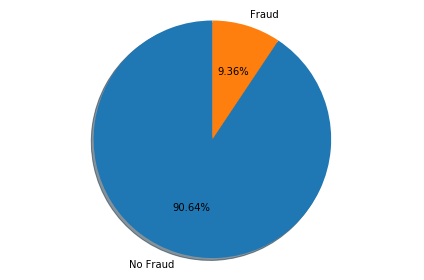

In [239]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['No Fraud', 'Fraud']
sizes = fraud.groupby('class').size()[:2]

explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

Tổng số giao dịch là 151112

Trong đó:

14141 giao dịch là gian lận chiếm 9.36%

136961 giao dịch là không gian lận chiếm 90.64%

### Phân tích dữ liệu 'country'

In [240]:
#total_fraud = fraud['class'].sum()
country_fraud = fraud.groupby('country').sum()
sorted_country_fraud = country_fraud['class'].sort_values(ascending=False)
sorted_country_fraud.head(10)

country
United States        5551
unknown              1883
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
Canada                348
France                300
Brazil                270
Germany               262
Name: class, dtype: int64

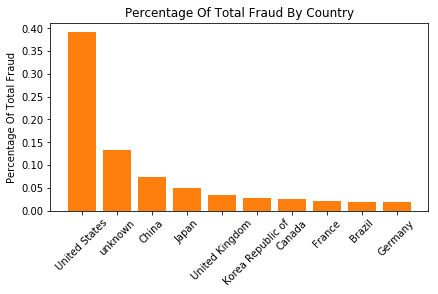

In [241]:
# Bar Chart Fraud By Count    
y = sorted_country_fraud[:10]/float(total_fraud)
x = np.arange(len(y))
    
fig, ax = plt.subplots()

ax.bar(x, y)
ax.bar(x, y)
ax.set_ylabel('Percentage Of Total Fraud')
ax.set_title('Percentage Of Total Fraud By Country')
ax.set_xticks(x)
ax.set_xticklabels(sorted_country_fraud.index.values[:10], rotation=45)
ax.grid(False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.savefig('percent_fraud_by_country')

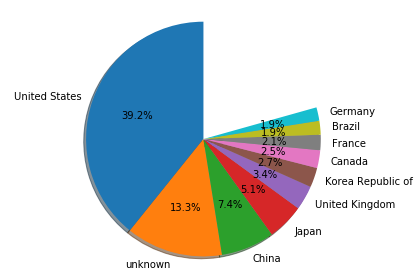

In [242]:
# Pie chart Browsers
labels = sorted_country_fraud.index.values[:10]
sizes = sorted_country_fraud[:10]/float(total_fraud)

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

##### Nhận xét:
Giao dịch gian lận đến từ USA nhiều nhât chiếm 39%

### Phân tích dữ liệu 'Browser'

In [243]:
browser_fraud = fraud.groupby('browser').sum()
sorted_browser_fraud = browser_fraud['class'].sort_values(ascending=False)
sorted_browser_fraud

browser
Chrome     6069
IE         3187
FireFox    2342
Safari     2225
Opera       328
Name: class, dtype: int64

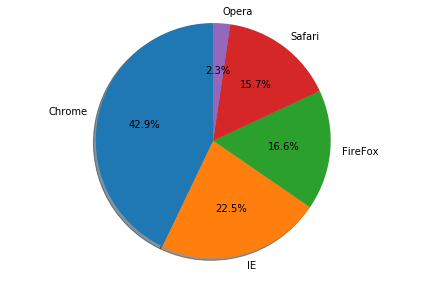

In [244]:
# Pie chart Browsers
labels = ['Chrome', 'IE', 'FireFox', 'Safari', 'Opera']
sizes = sorted_browser_fraud[:5]

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

##### Nhận xét:

Giao dịch gian lận thực hiện trên trình duyệt **Chrome** là nhiều nhất chiếm 42%

### Phân tích dữ liệu 'source'

In [245]:
source_fraud = fraud.groupby('source').sum()
sorted_source_fraud = source_fraud['class'].sort_values(ascending=False)
sorted_source_fraud

source
Ads       5513
SEO       5412
Direct    3226
Name: class, dtype: int64

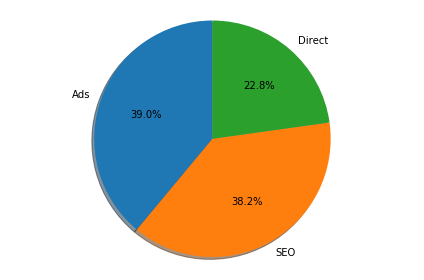

In [246]:
# Pie chart source
labels = ['Ads', 'SEO', 'Direct']
sizes = sorted_source_fraud[:3]

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

##### Nhận xét:

Giao dịch gian lận thực hiện chủ yếu trên kênh Ads và SEO

#### Phân tích dữ liệu 'time_to_purchase'

Từ 2 thuộc tính 'signup_time' và 'purchase_time' tạo ra một thuộc tính mới là 'time_to_purchase' - thời gian thực hiện
giao dịch từ khi mở tài khoản.

In [247]:
from datetime import datetime
purchase = fraud['purchase_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
signup = fraud['signup_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
fraud['time_to_purchase'] = purchase - signup
fraud['time_to_purchase'] = fraud['time_to_purchase'].apply(lambda x: x.days)
fraud.head(10)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
5   159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6    50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7   360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8   159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
9   182338  2015-01-25 17:49:49  2015-03-23 23:05:42              62   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0        unknown   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   
5  ALEYXFXINSXLZ    Ads  Chrome   M   18  2.809315e+09      0         Canada   
6  IWKVZHJOCLPUR    Ads  Chrome   F   19  3.987484e+09      0        unknown   
7  HPUCUYLMJBYFW    Ads   Opera   M   34  1.692459e+09      0  United States   
8  ILXYDOZIHOOHT    SEO      IE   F   43  3.719094e+09      0          China   
9  NRFFPPHZYFUVC    Ads      IE   M   31  3.416747e+08      0  United States   

   time_to_purchase  
0                52  
1                 0  
2                 0  
3                 5  
4                50  
5                49  
6                25  
7                49  
8                41  
9                57

In [248]:
y_fraud = fraud[fraud['class']==1]
time_to_purchase_fraud = y_fraud.groupby('time_to_purchase').size().to_frame(name = 'Count').reset_index()
time_to_purchase_fraud.head(20)

time_to_purchase  Count
0                  0   7648
1                  1     54
2                  2     41
3                  3     63
4                  4     49
5                  5     60
6                  6     49
7                  7     50
8                  8     50
9                  9     48
10                10     48
11                11     60
12                12     50
13                13     55
14                14     51
15                15     59
16                16     59
17                17     54
18                18     44
19                19     55

In [249]:
# Mean of 'time_to_purchase'
#y_fraud
sum = y_fraud['time_to_purchase'].sum()
num = y_fraud['time_to_purchase'].count()
num1 = y_fraud['time_to_purchase'].count() - 7648
mean = sum/num1
print (sum)
print (num)
print (num1)
print (mean)

393715
14151
6503
60.543595263724434


##### Nhận xét
Trong 14151 giao dịch giận lận thì có '7648' (54%) giao dịch thực hiện ngày trong ngày mở tài khoản.
Khi loại giá trị này ra thì ta có thời gian trung bình 1 tài khoản thực hiện giao dịch là 60 ngày.
Đây là một thuộc tính quan trọng trong model dự đoán.

### Từ các phân tích trên có thể trả lời câu hỏi
What kinds of users are more likely to be classified as at risk? 
What are their characteristics?
1. Những giao dịch đến từ tài khoản USA
2. Những giao dịch thực hiện trong ngày mở tài khoản.
3. Những giao dịch thực hiện trên trình duyệt Chrome

### BUILD MODEL

In [250]:
fraud.head(10)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
5   159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6    50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7   360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8   159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
9   182338  2015-01-25 17:49:49  2015-03-23 23:05:42              62   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0        unknown   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   
5  ALEYXFXINSXLZ    Ads  Chrome   M   18  2.809315e+09      0         Canada   
6  IWKVZHJOCLPUR    Ads  Chrome   F   19  3.987484e+09      0        unknown   
7  HPUCUYLMJBYFW    Ads   Opera   M   34  1.692459e+09      0  United States   
8  ILXYDOZIHOOHT    SEO      IE   F   43  3.719094e+09      0          China   
9  NRFFPPHZYFUVC    Ads      IE   M   31  3.416747e+08      0  United States   

   time_to_purchase  
0                52  
1                 0  
2                 0  
3                 5  
4                50  
5                49  
6                25  
7                49  
8                41  
9                57

##### Loại bỏ một vài thuộc tính không liên quan đến việc dự đoán 
'user_id' 'signup_time' 'purchase_time' 'device_id' 'ip_address' 'sex'

In [251]:
fraud.drop(['user_id', 'signup_time', 'purchase_time','device_id', 'ip_address', 'sex'], axis=1, inplace=True)
fraud.head()

purchase_value source browser  age  class        country  time_to_purchase
0              34    SEO  Chrome   39      0          Japan                52
1              16    Ads  Chrome   53      0  United States                 0
2              15    SEO   Opera   53      1  United States                 0
3              44    SEO  Safari   41      0        unknown                 5
4              39    Ads  Safari   45      0  United States                50

##### Mã hóa thuộc tính 'source' 'browser'

In [252]:
fraud = pd.get_dummies(fraud, columns=['source', 'browser'])
fraud.head(5)

purchase_value  age  class        country  time_to_purchase  source_Ads  \
0              34   39      0          Japan                52           0   
1              16   53      0  United States                 0           1   
2              15   53      1  United States                 0           0   
3              44   41      0        unknown                 5           0   
4              39   45      0  United States                50           1   

   source_Direct  source_SEO  browser_Chrome  browser_FireFox  browser_IE  \
0              0           1               1                0           0   
1              0           0               1                0           0   
2              0           1               0                0           0   
3              0           1               0                0           0   
4              0           0               0                0           0   

   browser_Opera  browser_Safari  
0              0               0  
1              0               0  
2              1               0  
3              0               1  
4              0               1

##### Mã hóa thuộc tính 'country'

In [253]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = fraud['country']
le.fit(y)
y=le.fit_transform(y)
fraud['EncodedCountry'] = y
print('Classes:',le.classes_)
print('Response variable after encoding:',y)
fraud.head(5)
fraud.drop(['country'], axis=1, inplace=True)
fraud.head()

Classes: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire; Sint Eustatius; Saba'
 'Bosnia and Herzegowina' 'Botswana' 'Brazil'
 'British Indian Ocean Territory' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Chile' 'China' 'Colombia' 'Congo'
 'Congo The Democratic Republic of The' 'Costa Rica' "Cote D'ivoire"
 'Croatia (LOCAL Name: Hrvatska)' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia' 'European Union'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Guadeloupe' 'Guam' 'Guatemala'
 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Ir

purchase_value  age  class  time_to_purchase  source_Ads  source_Direct  \
0              34   39      0                52           0              0   
1              16   53      0                 0           1              0   
2              15   53      1                 0           0              0   
3              44   41      0                 5           0              0   
4              39   45      0                50           1              0   

   source_SEO  browser_Chrome  browser_FireFox  browser_IE  browser_Opera  \
0           1               1                0           0              0   
1           0               1                0           0              0   
2           1               0                0           0              1   
3           1               0                0           0              0   
4           0               0                0           0              0   

   browser_Safari  EncodedCountry  
0               0              84  
1               0             171  
2               0             171  
3               1             181  
4               1             171

##### Build Model By LogisticRegression

In [254]:
X = fraud.drop(['class'], axis=1)
y = fraud['class']

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=420)

In [256]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

F:\Anaconda3\envs\mynewenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [257]:
y_pred = LogReg.predict(X_test)

In [258]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[34353,     0],
       [ 3425,     0]], dtype=int64)

In [259]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     34353
           1       0.00      0.00      0.00      3425

   micro avg       0.91      0.91      0.91     37778
   macro avg       0.45      0.50      0.48     37778
weighted avg       0.83      0.91      0.87     37778



F:\Anaconda3\envs\mynewenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Question: Explain how different assumptions about the cost of false positives vs false negatives would impact the model.
Accuracy = (TP+TN)/(TP+FP+FN+TN)
-> FP và FN càng thấp thì Accuracy càng cao

Precision = TP/(TP+FP)
-> FP càng thấp thì Precision càng cao

Recall = TP/(TP+FN)
-> Recall gọi là tốt nếu nó lớn hơn 0.5
-> FN càng thấp thì Recall sẽ càng cao

##### Build Model By RandomForestClassifier

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
#Create training and testing sets
y_1 = fraud['class']
X_1 = fraud.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=420)

In [261]:
rf = RandomForestClassifier(class_weight = {0: .9, 1: .1})
rf.fit(X_train, y_train)

F:\Anaconda3\envs\mynewenv\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight={0: 0.9, 1: 0.1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [262]:
predictions = rf.predict(X_test)
f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
accuracy = rf.score(X_test, y_test)
    
print ("f1 score: {}".format(f1))
print ("#######################")
print ("recall: {}".format(recall))
print ("#######################")
print ("precision: {}".format(precision))
print ("#######################")
print ("accuracy: {}".format(accuracy))

f1 score: 0.6694744552279802
#######################
recall: 0.5337226277372262
#######################
precision: 0.8978388998035364
#######################
accuracy: 0.9522208692890042
